# Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [5]:
df=pd.read_csv("reddit_vm.csv")
df=df[["title","score"]]

In [6]:
df

,title,score
0,Health Canada approves AstraZeneca COVID-19 va...,7
1,COVID-19 in Canada: 'Vaccination passports' a ...,2
2,Coronavirus variants could fuel Canada's third...,6
3,Canadian government to extend COVID-19 emergen...,1
4,Canada: Pfizer is 'extremely committed' to mee...,6
...,...,...
1527,Comment,8
1528,Comment,-1
1529,Comment,-1
1530,Comment,1


In [7]:
# Removing the useless comment
df=df[df["title"]!="Comment"]
df

,title,score
0,Health Canada approves AstraZeneca COVID-19 va...,7
1,COVID-19 in Canada: 'Vaccination passports' a ...,2
2,Coronavirus variants could fuel Canada's third...,6
3,Canadian government to extend COVID-19 emergen...,1
4,Canada: Pfizer is 'extremely committed' to mee...,6
...,...,...
550,I am a father of five unvaccinated children. A...,1
551,Love Them. Protect Them. Never Inject Them.,1
552,Vaccines Are Just Asping For Trouble,2
553,Dr. Harper explained in her presentation that ...,1


In [9]:
# Selecting the rows having score >0

df=df[df["score"]>=0]


In [10]:
# Selecting the rows having score <10
df=df[df["score"]<=10]

In [11]:
df

,title,score
0,Health Canada approves AstraZeneca COVID-19 va...,7
1,COVID-19 in Canada: 'Vaccination passports' a ...,2
2,Coronavirus variants could fuel Canada's third...,6
3,Canadian government to extend COVID-19 emergen...,1
4,Canada: Pfizer is 'extremely committed' to mee...,6
...,...,...
550,I am a father of five unvaccinated children. A...,1
551,Love Them. Protect Them. Never Inject Them.,1
552,Vaccines Are Just Asping For Trouble,2
553,Dr. Harper explained in her presentation that ...,1


# Checking the quantity of values

In [11]:
df["score"].value_counts()

0     54
1     51
4     41
2     37
3     35
5     34
6     32
7     25
8     20
10    16
9     16
Name: score, dtype: int64

In [12]:
df

,title,score
0,Health Canada approves AstraZeneca COVID-19 va...,7
1,COVID-19 in Canada: 'Vaccination passports' a ...,2
2,Coronavirus variants could fuel Canada's third...,6
3,Canadian government to extend COVID-19 emergen...,1
4,Canada: Pfizer is 'extremely committed' to mee...,6
...,...,...
550,I am a father of five unvaccinated children. A...,1
551,Love Them. Protect Them. Never Inject Them.,1
552,Vaccines Are Just Asping For Trouble,2
553,Dr. Harper explained in her presentation that ...,1


# Splitting the model to avoid overfitting

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
x_train,x_test,y_train,y_test=train_test_split(df.title,df.score,test_size=0.2)

# Improting CountVectorizer to transform the text

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

# Creating model

In [22]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [23]:
x_train_count=cv.fit_transform(x_train)
x_train_count

<288x1738 sparse matrix of type '<class 'numpy.int64'>'
	with 4638 stored elements in Compressed Sparse Row format>

In [24]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
model.fit(x_train_count,y_train)

MultinomialNB()

In [26]:
x_test

200    Seeking help to inform an anti vaxxer who may ...
198                 For those concerned about thimerosal
396    However, hidden to most Americans was an elabo...
472    ...but im not a biologist or even a chemist or...
372    (UN)convincing paper (tries) to provide proof ...
                             ...                        
415       An easy to understand summary of the evidence:
460    It stems from flawed thinking and ignorance. A...
236    How does an unvaccinated child present a risk ...
156    I'm not necessarily anti-vaccine but we need t...
333    I wonder if that correlates with glyphosate to...
Name: title, Length: 73, dtype: object

In [27]:
l=cv.transform(list(x_test))

In [28]:
predicted=model.predict(l)
predicted

array([5, 1, 1, 6, 1, 4, 1, 1, 0, 3, 0, 0, 1, 4, 1, 0, 1, 7, 1, 0, 0, 2,
       4, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 1, 1, 0, 3, 1, 1, 0, 1, 0, 0, 1,
       5, 1, 2, 1, 0, 1, 5, 1, 2, 1, 1, 5, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       4, 1, 4, 1, 1, 1, 1])

In [29]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(predicted,y_test)
cf

array([[5, 5, 0, 1, 3, 1, 2, 2, 3, 1, 0],
       [8, 6, 4, 3, 3, 3, 2, 2, 1, 0, 1],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Text(33.0, 0.5, 'Predicted Values')

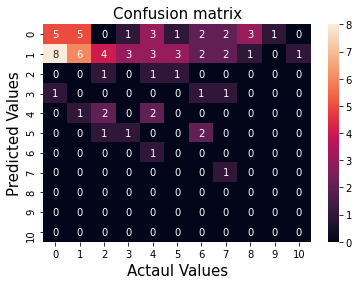

In [30]:
sns.heatmap(cf,annot=True)
plt.title("Confusion matrix",fontsize=15)
plt.xlabel("Actaul Values",fontsize=15)
plt.ylabel("Predicted Values",fontsize=15)


In [31]:
data=pd.DataFrame()

In [32]:
data["test"]=x_test

In [ ]:
data["score"]=predicted
data

In [18]:
data.sort_index(inplace=True)

NameError: name 'data' is not defined

In [ ]:
data